# Build a Simple Neural Net - Python

##  Outline and Administrivia

1.  Outline of course
2.  Grading

##  Objectives for Today
1.  Overall - Use numpy (matrix language) to build and train simple neural net
2.  Discuss and implement gradient descent
3.  Write the code for two problems - classification and regression
4.  Define 2-layer python neural nets to solve these problems

## What you will learn
1.  What are neural nets
2.  What is deep learning
3.  Why so much of this course is on optimization
4.  How to build a simple neural net that illustrates the process

# Background on Neural Nets
Neural nets derive their inspiration from animal nervous systems.  The wikipedia page on neurons gives a good illustration of the wiring of an animal nervous system. 
https://en.wikipedia.org/wiki/Neuron

## Q's
1.  What does it mean to say a neuron fires?
2.  What causes a neuron to fire?
3.  What are the inputs to a neuron and how many of them are there (fan-in)?
4.  What are the outputs of a neuron and how many of them are there (fan-out)?

Scientists began to understand the operation of individual neurons and the interconnection of neurons into networks for animal locomotion and cognition.  Mccolloch and Pitts (MCP) developed an abstract version of a neuron and proposed analyzing networks of these abstract neurons as a way to understand and simulate the operation of their biological equivalents. Part of the hope was that networks of these abstract neurons would give insight into the operation of animal brains and perhaps offer some of the same functionality (recall Marvin the computer in "Hitchhiker's Guide to the Galaxy" - "I'm so depressed").  The wiki page on artificial neural networks gives a good summary of the abstract neurons stemming from the MCP neuron.  
https://en.wikipedia.org/wiki/Artificial_neuron

## Q's
1.  What elements of a real neuron are captured by the MCP neuron?
2.  What elements are not?  
3.  How would you connect MCP neurons into a network?  
4.  Suppose you want to use a network of MCP neurons for machine learning (a classifier).  

The most general arrangement of neuron connections is the "fully connected" network wherein every neuron is an input to every other neuron.  Fully-connected neural nets are not (yet) practical in applications.  The neural networks used in applications have more limited structures.  The wiki page on artificial neural networks shows the structure for one of the most common architectures - the feed-forward network.  

https://en.wikipedia.org/wiki/Artificial_neural_network

## Q's
1.  In an image classification problem what would the ANN input and output be?  
2.  What constitutes "training" an ANN?


## A Simple Classification Problem

You'll now learn to build a simple neural net in python.  First, define a problem.  The code below generates a "synthetic" dataset.  The dataset is called synthetic because the data are generated by a computer algorithm.  Synthetic data are frequently used as test cases for algorithms because knowing how the data were generated means that you also know the correct solution to the problem.  If you're developing a new algorithm, having a problem where you know the correct answer helps you determine how well your new algorithm is performing.

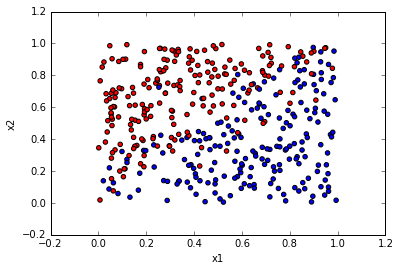

In [1]:
__author__ = 'mike.bowles'
import random
import matplotlib.pyplot as plt
%matplotlib inline
#synthesize a 2-d classification data set

#define lists to hold some data.  X1 and X2 will be attributes (features) and Y will be labels.  
X1 = []
X2 = []
Y = []
noiseSd = 0.2
numRows = 400
for i in range(numRows):
    #generate attributes x1 and x2 by drawing from uniform (0,1)
    x1 = random.random()
    x2 = random.random()
    y = 0.0
    if x2 > (x1 + random.normalvariate(0.0, noiseSd)):
        y = 1.0
    X1.append(x1); X2.append(x2); Y.append(y);

colorMap = {0.0: "blue", 1.0: "red"}
colors = [colorMap[c] for c in Y]
plt.scatter(X1, X2, c=colors)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Q
What is the difference between a classification problem and a regression problem?

Machine learning problems are frequently defined by a data set that is composed of two linked data sets.  One dataset contains the answers that are to be predicted by the machine learning model you build.  The other dataset has the variables that are available to you for producing that prediction.  

## Q 
What python list in the synthetic problem above correspond to the answers?  

The answers are also called labels, targets and outcomes. 

## Q 
What python list correspond to the variables used for generating predictions?

## Steps for building a neural net predictive model (this is the takeaway for this lecture)
__1.  Define the network architecture - input/output, interconnections, non-linearities, tunable parameters__  
__2.  Define the loss function - usually a sum over the data__  
__3.  Find the gradient of the loss wrt the tunable parameters__  
__4.  Use gradient descent to find best parameter values__  

# Step 1:  Define network architecture

Variables used for prediction are also called attributes, features and predictors.  The figure depicts the neural net that you'll train to build a model for this simple problem.  
<img src="w1L1SimpleNN.png">
This is called a two-layer, fully-connected, feed-forward network.  You'll see more about those terms later in the class.  Signals in this network flow from left to right.  The two quantities x1 and x2 are inputs.  These get multiplied by w1 and w2 respectively and then pass through the block titled "sigmoid".  The sigmoid block adds the two inputs together and applies a sigmoid non-linearity.  You'll see during the course of this class that non-linearities play a key role in neural networks.  You will learn how to choose the correct non-linearity for your problem.  

## Q 
What properties should the non-linearity have for the classification problem defined by the dataset above?  Discuss this a little and then you'll see what the sigmoid non-linearity is.  

Let's summarize what you've learned about this neural net so far.  At this point you've got three lists X1, X2 and Y.  At an index value "n" the two attributes X1[n] and X2[n] correspond to the label Y[n].  These constitute the dataset.  The neural net shown in the figure above constructs a model of the form 
$$\hat{y_n} = S(w1 * x1_n + w2 * x2_n)$$

The symbol "~" denotes that the model output is an estimate of the true label Y[n] and the function S() is the sigmoid function.  The sigmoid function is a logistic function.  That is defined by 
$S(x) = \frac{1}{(1 + e^{-x})}$.  The code block below shows the code for the sigmoid function and plots the function over a range of values.  

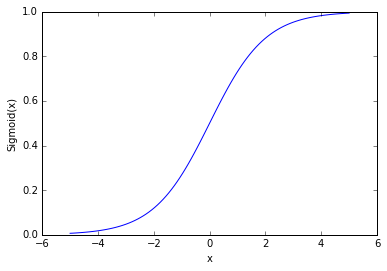

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#define sigmoid function S()
def S(x):
    return 1.0 / (1.0 + math.exp(-x))

Xprint = np.linspace(-5.0, 5.0, 100)
Sprint = [S(x) for x in Xprint]
plt.plot(Xprint, Sprint)
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.show()

##  Q
Why does sigmoid non-linearity make sense for this problem?  

The code below shows how the sigmoid function gets used with the attributes to delivers a solution

In [3]:
def simpleNeuralNet(x1, x2, w1, w2):
    return S(w1 * x1 + w2 * x2)

## Q 
Where is the network architecture defined?

# Step 2: Define a loss function
Now you've got the following things - a problem (data set) and a solution (the network whose output will generate approximate Y's).  You can supply the x1 and x2 required to evaluate the function simpleNeuralNet().  Those are given in the problem statement.  Where do the model parameters w1 and w2 come from?  The process of determining the model parameters (also called weights) is called "training".  To train a neural network first requires a definition of a loss function.  Later this course will discuss a number of different loss functions and that will be another element of the network that you'll learn to adapt to your particular problems.  In this problem the targets are 0.0 or 1.0 and the model given produces answers in the interval (0.0, 1.0).  So mean squared error makes sense for measuring the model's loss.  
$Loss = L(X1, X2, Y, w_1, w_2) = \frac{1}{M}\sum_{i=1}^{M} (y(i) - S(w_1x_1(i) + w_2x_2(i)))^2$

Having the performance criterion makes the search for model parameters into a minimization problem.  

## Class competition
Try different values for the weights.  See who can get the best value for the weights.  

In [4]:
def L(X1, X2, Y, w1, w2):
    sqErr = [(yy - simpleNeuralNet(xx1, xx2, w1, w2)) ** 2 for (xx1, xx2, yy) in zip(X1, X2, Y)]
    M = float(len(X1))
    meanSqErr = (1.0 / M) * sum(sqErr)
    return meanSqErr

print(L(X1, X2, Y, 0.0, 0.0))

0.25


# Step 3: Find gradient of the loss wrt parameters

## Minimizing the Loss Function
Trying different values can work with two weights, but by the end of this week, you will be training models with millions of weights.  To optimize those a more systematic approach is required.  The usual method for solving this minimization problem is called gradient descent.  The wikipedia page on gradient descent has a good description of how it works.  https://en.wikipedia.org/wiki/Gradient_descent .  

To apply gradient descent you must take the derivatives of L (the loss) with respect to the model parameters (w1 and w2).  

$\nabla L = \begin{bmatrix}
  \frac{d}{dw_1} L(w_1, w_2) \\
  \frac{d}{dw_2} L(w_1, w_2)
 \end{bmatrix}$
 
 A little bit of calculus gives:
 $\nabla L = \begin{bmatrix}
  \frac{d}{dw_1} L(w_1, w_2) \\
  \frac{d}{dw_2} L(w_1, w_2)
 \end{bmatrix}  = -\frac{2}{M} \begin{bmatrix}
  \ \sum_{i=1}^{M} (y(i) - S(arg))S(arg)S(-arg)x_1(i) \\
  \ \sum_{i=1}^{M} (y(i) - S(arg))S(arg)S(-arg)x_2(i)
 \end{bmatrix}$
 
 where $arg = w_1x_1(i) + w_2x_2(i)$.  
 When you have time, please do these partial derivatives by yourself to prove that the gradient is correct.  
 Hint: $ \frac{d}{darg} S(arg) = S(arg) * S(-arg) $ 
 
 
 
 The code block below implements these equations into a gradient function.  

In [5]:
def gradL(X1, X2, Y, w1, w2):
    M = float(len(X1))
    arg = [w1 * x1 + w2 * x2 for (x1, x2) in zip(X1, X2)]
    summand1 = [(yy - S(a)) * S(a) * S(-a) * xx1 for (yy, a, xx1) in zip(Y, arg, X1)]
    summand2 = [(yy - S(a)) * S(a) * S(-a) * xx2 for (yy, a, xx2) in zip(Y, arg, X2)]
    grad1 = (-2.0 / M) * sum(summand1)
    grad2 = (-2.0 / M) * sum(summand2)
    return [grad1, grad2]

#Numerical version of gradient function to check calculus
def gradCheck(X1, X2, Y, w1, w2):
    delta = 1e-5
    grad1 = (L(X1, X2, Y, w1 + delta, w2) - L(X1, X2, Y, w1, w2)) / delta
    grad2 = (L(X1, X2, Y, w1, w2 + delta) - L(X1, X2, Y, w1, w2)) / delta
    return [grad1, grad2]

#Try some test values to see that gradL function is correct
w1Test = 5.0
w2Test = 5.0
print(gradL(X1, X2, Y, w1Test, w2Test))
print(gradCheck(X1, X2, Y, w1Test, w2Test))

[0.006999127862604692, 0.0032489623030706035]
[0.0069991125117851985, 0.0032489598456031383]


##  Q
Why build the gradient check function?

# Step 4: Building and running gradient descent
The code snip below puts the pieces together to run train the neural net model by gradient descent. 

## In-class competition
See who can get the training error below 0.12 in the fewest number of steps.  


(0, 0.248606529854924, -0.01796101637291779, 0.019388614197190082)
(100, 0.16598603037126947, -1.4475482137833142, 1.4281935899358364)
(200, 0.137417004567361, -2.309877452271772, 2.243510757587552)
(300, 0.12414647311390388, -2.9005050530324255, 2.800448119903111)
(400, 0.11657558569365023, -3.3473764915589372, 3.221705389503279)
(500, 0.11168990580351765, -3.706597613166913, 3.5603912579188153)
(600, 0.10827589057599561, -4.006980919359096, 3.8436432610575375)
(700, 0.10575510694437912, -4.265151430519768, 4.087096259022346)
(800, 0.10381743289786004, -4.491542917189254, 4.300563445388643)
(900, 0.10228169459924377, -4.693126587206518, 4.490606193153025)
(1000, 0.1010349170763759, -4.874790095970865, 4.661829114320353)
(1100, 0.10000295471127148, -5.040093469173801, 4.817589226160257)
(1200, 0.0991351006208884, -5.1917110437574445, 4.9604105344468366)
(1300, 0.09839548423016777, -5.3317036822583574, 5.09223951740769)
(1400, 0.09775800256625948, -5.461693822190868, 5.214609537540784)


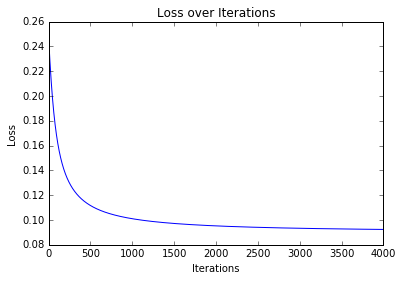

In [6]:
#Initialize weights
w1 = 0.0
w2 = 0.0

#Set the learning rate and number of steps to be taken
lr = 0.5
nSteps = 4000

#Initialize list for storing loss function history
loss = []
w1_list = []
w2_list = []

#Loop for nSteps gradient descent steps
for iStep in range(nSteps):
    grad = gradL(X1, X2, Y, w1, w2)
    w1 -= lr * grad[0]
    w2 -= lr * grad[1]
    loss.append(L(X1, X2, Y, w1, w2))
    if not iStep % 100:
        print(iStep, L(X1, X2, Y, w1, w2), w1, w2)
        w1_list.append(w1)
        w2_list.append(w2)

plt.plot(loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title("Loss over Iterations")
plt.show()

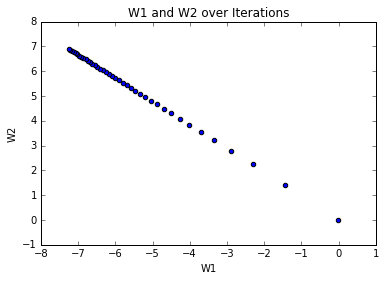

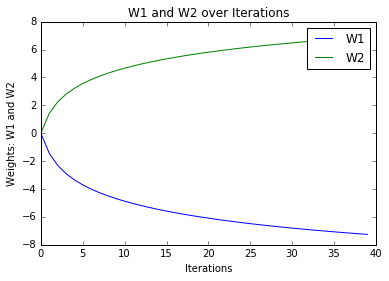

In [7]:
# Let's take a look at how the weights are updating

plt.scatter(w1_list, w2_list)
plt.xlabel('W1')
plt.ylabel('W2')
plt.title("W1 and W2 over Iterations")
plt.show()

plt.plot(w1_list, label="W1")
plt.plot(w2_list, label='W2')
plt.xlabel('Iterations')
plt.ylabel('Weights: W1 and W2')
plt.title("W1 and W2 over Iterations")
plt.legend()
plt.show()

If we ran a logistic regression, we'll get similar results. We won't get identical results because the loss function of a logistic regression (maximize likelihood) is not exactly the same as the loss function (minimize MSE) we have defined here even, but the solutions are very similar.

In [8]:
import statsmodels.api as sm
import pandas as pd

X = pd.DataFrame({'x1': X1, 'x2': X2})
X = sm.add_constant(X)
model = sm.Logit(Y, X).fit()
print(model.summary())
print('Mean Squared Errors: ', sum(model.resid_response ** 2) / len(model.resid_response))

Optimization terminated successfully.
         Current function value: 0.278661
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Tue, 05 Jul 2016   Pseudo R-squ.:                  0.5980
Time:                        12:18:25   Log-Likelihood:                -111.46
converged:                       True   LL-Null:                       -277.25
                                        LLR p-value:                 9.966e-73
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.8776      0.400     -2.194      0.028        -1.662    -0.094
x1            -9.7435      1.

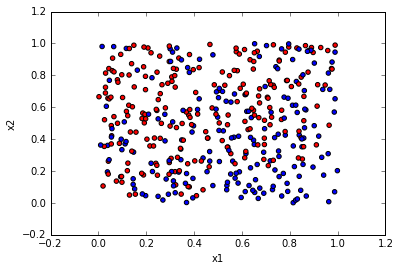

In [9]:
# Let's just increase the noise.
# Then, take a look at the weights and the loss function value

X1_noisy = [] # renaming variable
X2_noisy = [] # renaming variable
Y_noisy = [] # renaming variable
noiseSd = 0.7 # THE ONLY THING THAT'S REALLY CHANGED
numRows = 400
for i in range(numRows):
    x1 = random.random()
    x2 = random.random()
    y = 0.0
    if x2 > (x1 + random.normalvariate(0.0, noiseSd)):
        y = 1.0
    X1_noisy.append(x1); X2_noisy.append(x2); Y_noisy.append(y);

colorMap = {0.0: "blue", 1.0: "red"}
colors_noisy = [colorMap[c] for c in Y_noisy] # renaming variable
plt.scatter(X1_noisy, X2_noisy, c=colors_noisy)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

(0, 0.24956465677893933, -0.0032747595863738305, 0.014440741070514407)
(100, 0.2285169771556957, -0.5654630334721288, 0.8391831260016046)
(200, 0.22098983080918516, -0.9928643167297003, 1.2731006617989291)
(300, 0.21776587351512042, -1.2699591794208074, 1.560651803671529)
(400, 0.21623023892271445, -1.459302206430277, 1.7614055048674342)
(500, 0.21543759839231244, -1.5944355475607528, 1.9067026134107503)
(600, 0.21500409973669574, -1.693916839606862, 2.0146820472992233)
(700, 0.2147568663679158, -1.7688013944040393, 2.096506006881951)
(800, 0.2146114391645906, -1.8260979286979309, 2.1594152093754704)
(900, 0.2145238920235255, -1.8704743641359718, 2.2083139734142847)
(1000, 0.2144702522554149, -1.9051628529327622, 2.246641566406283)
(1100, 0.21443693890208151, -1.9324712705478753, 2.2768778889635586)
(1200, 0.21441603033431159, -1.9540882764017988, 2.3008513701572704)
(1300, 0.2144027987198221, -1.971273773062296, 2.3199344193816707)
(1400, 0.21439437071507034, -1.9849825536349897, 2.33

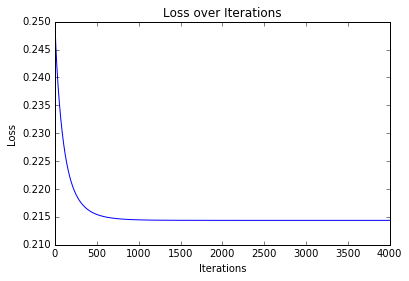

In [10]:
# This part is completely identical except renamed variables

w1_noisy = 0.0 # renamed
w2_noisy = 0.0 # renamed

#Set the learning rate and number of steps to be taken
lr = 0.5
nSteps = 4000

#Initialize list for storing loss function history
loss = []
w1_noisy_list = []
w2_noisy_list = []

#Loop for nSteps gradient descent steps
for iStep in range(nSteps):
    grad = gradL(X1_noisy, X2_noisy, Y_noisy, w1_noisy, w2_noisy)
    w1_noisy -= lr * grad[0]
    w2_noisy -= lr * grad[1]
    loss.append(L(X1_noisy, X2_noisy, Y_noisy, w1_noisy, w2_noisy))
    if not iStep % 100:
        print(iStep, L(X1_noisy, X2_noisy, Y_noisy, w1_noisy, w2_noisy), w1_noisy, w2_noisy)
        w1_noisy_list.append(w1_noisy)
        w2_noisy_list.append(w2_noisy)

plt.plot(loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title("Loss over Iterations")
plt.show()

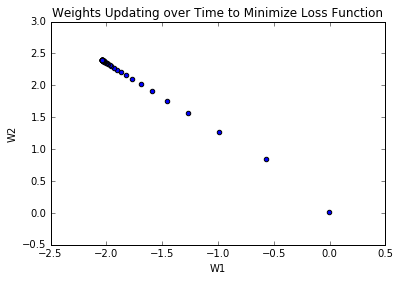

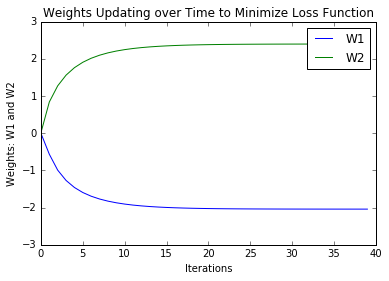

In [11]:
# Let's see how the weights update over iterations

plt.scatter(w1_noisy_list, w2_noisy_list)
plt.xlabel("W1")
plt.ylabel("W2")
plt.title("Weights Updating over Time to Minimize Loss Function")
plt.show()

plt.plot(w1_noisy_list, label="W1")
plt.plot(w2_noisy_list, label="W2")
plt.xlabel("Iterations")
plt.ylabel("Weights: W1 and W2")
plt.title("Weights Updating over Time to Minimize Loss Function")
plt.legend()
plt.show()

With more noise, the loss function plateaus at a higher value. That's expected, more noise means we have a harder time to classify the points.  
With more noise, the weights decrease! What does that happen? Take a look.

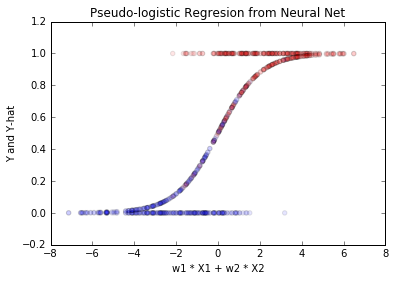

In [12]:
# less noisy data

x_axis = [w1 * x1 + w2 * x2 for x1, x2 in zip(X1, X2)]
y_hat = [S(x) for x in x_axis]

colorMap = {0.0: "blue", 1.0: "red"}
colors = [colorMap[c] for c in Y]

plt.scatter(x_axis, Y, c=colors, alpha=0.1) # true points
plt.scatter(x_axis, y_hat, c=colors, alpha=0.1) # raw predictions from the neural net
plt.xlabel('w1 * X1 + w2 * X2')
plt.ylabel('Y and Y-hat')
plt.title('Pseudo-logistic Regresion from Neural Net');

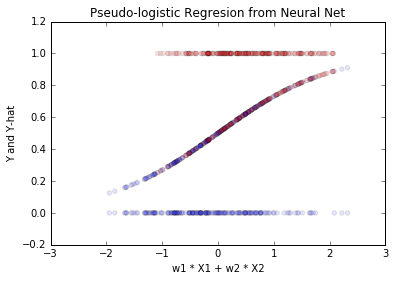

In [13]:
# noisy data

x_axis = [w1_noisy * x1 + w2_noisy * x2 for x1, x2 in zip(X1_noisy, X2_noisy)]
y_hat = [S(x) for x in x_axis]

colorMap = {0.0: "blue", 1.0: "red"}
colors = [colorMap[c] for c in Y_noisy]

plt.scatter(x_axis, Y_noisy, c=colors, alpha=0.1) # true points
plt.scatter(x_axis, y_hat, c=colors, alpha=0.1)
plt.xlabel('w1 * X1 + w2 * X2')
plt.ylabel('Y and Y-hat')
plt.title('Pseudo-logistic Regresion from Neural Net');

1. Explain why the loss function is high or low when you increase noise?  
2. Explain why the weights are big or small when you increase noise?  
3. Predict what will happen when noiseSd is set to 0? Do it! Set noiseSD = 0 for the noisy version and run its 3 respective code cells, so now it will be noise-less. The points are now perfecttly separable. Do the weights, loss function, and picture match what you predicted?  
Hint: look at the residuals in both graphs

## In-class coding exercise - add a bias terms to the network
The model above is pretty simple.  To make it somewhat more realistic add a bias term to the basic network equation.  In the previous example the network equation was :
$$y_n = S(w1 * x1_n + w2 * x2_n)$$
Add a bias/intercept term:
$$y_n = S(w1 * x1_n + w2 * x2_n + b)$$  
Now repeat the steps above with this new network architecture.  Use the code above as a template and write the code that:
### 1.  Define the network architecture
### 2.  Generate the loss function
### 3.  Generate the gradient wrt to the three network parameters
### 4.  Use gradient descent to find parameters that minimize loss

Do you get any performance improvement?